In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('NAS.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
5,2003-12-25,NaN,NaN,NaN,NaN,NaN,NaN
6,2003-12-26,NaN,NaN,NaN,NaN,NaN,NaN
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
9,2003-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
# I Want to drop the NaN value columns
df = df.dropna(axis = 'rows', how = 'any')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [181]:
# I Want the date columne to be datetime 
df['Date']= pd.to_datetime(df['Date'])
# the date column is my independant variable

<AxesSubplot:xlabel='Date', ylabel='Close'>

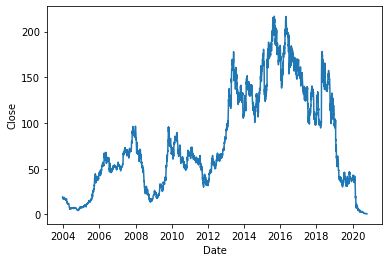

In [182]:
#I Want to look at the Close column
sns.lineplot(data = df, x = 'Date', y = 'Close')
# the close column is my dependent variable

In [183]:
X = df.iloc[ : , 0].values
y = df.iloc[ : , 4].values


<AxesSubplot:>

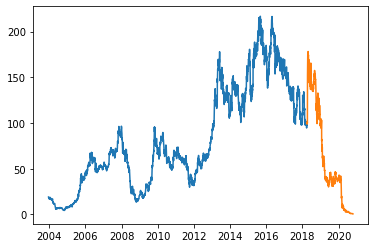

In [184]:
# i want to split my data so that i can test on a part of the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, shuffle = False, random_state = 60)

sns.lineplot(x = X_train, y = y_train)
sns.lineplot(x = X_test, y = y_test)

In [185]:
# i want to scale the value to fit the model later. 
from sklearn.preprocessing import StandardScaler

X_sc = StandardScaler()
y_sc = StandardScaler()

X_train = X_sc.fit_transform(X_train.reshape(-1, 1))
y_train = y_sc.fit_transform(y_train.reshape(-1, 1))
X_test = X_sc.fit_transform(X_test.reshape(-1, 1))
y_test = y_sc.fit_transform(y_test.reshape(-1, 1))


In [186]:
# now i want to fit a model to my data
from sklearn.svm import SVR

svr_linear_regr = SVR(kernel = 'linear', shrinking = False)
svr_linear_model = svr_linear_regr.fit(X_train, y_train)
#not sure why -X_train works better than X_train

C:\Users\Sigurd\.conda\envs\dave3625\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [187]:
rbf_regr = SVR(kernel = 'rbf')
rbf_model = rbf_regr.fit(X_train, y_train)

C:\Users\Sigurd\.conda\envs\dave3625\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [188]:
poly_regr = SVR(kernel = 'poly', degree = 3)
poly_model = poly_regr.fit(X_train, y_train)

C:\Users\Sigurd\.conda\envs\dave3625\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [189]:
# i want to predict some y values based on the model

y_pred_svr_linear = svr_linear_model.predict(X_test.reshape(-1, 1))
y_pred_svr_linear = y_sc.inverse_transform(y_pred_svr_linear)



In [190]:

y_pred_rbf = rbf_model.predict(X_test.reshape(-1, 1))
y_pred_rbf = y_sc.inverse_transform(y_pred_rbf)



In [191]:

y_pred_poly = poly_model.predict(X_test.reshape(-1, 1))
y_pred_poly = y_sc.inverse_transform(y_pred_poly)


In [192]:
from sklearn.linear_model import LinearRegression
linear_regr = LinearRegression()
linear_regr_model = linear_regr.fit(X_train,y_train)

In [193]:
y_pred_linear = linear_regr_model.predict(X_test)
y_pred_linear = y_sc.inverse_transform(y_pred_linear)


In [194]:
svr_linear_model.score(X_test, y_test)

-2.2344477347418947

In [195]:
rbf_model.score(X_test, y_test)

-2.2657116704473417

In [196]:
poly_model.score(X_test, y_test)

-1.593133169557491

In [197]:
linear_regr_model.score(X_test, y_test)

-2.250879133429543

<AxesSubplot:>

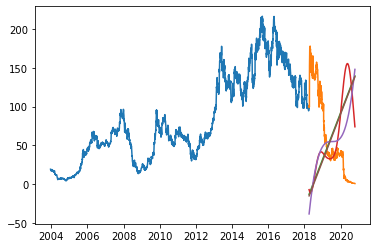

In [198]:
#this is just for visuals
X = df.iloc[ : , 0].values
y = df.iloc[ : , 4].values

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X, y, test_size = 0.15, shuffle = False)


sns.lineplot(x = X_train_vis, y = y_train_vis)
sns.lineplot(x = X_test_vis, y = y_test_vis)
sns.lineplot(x = X_test_vis, y = y_pred_svr_linear)
sns.lineplot(x = X_test_vis, y = y_pred_rbf)
sns.lineplot(x = X_test_vis, y = y_pred_poly)
sns.lineplot(x = X_test_vis, y = y_pred_linear.ravel())


<AxesSubplot:>

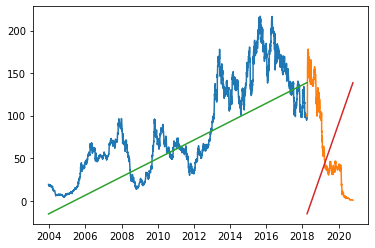

In [199]:
#i want to see the regression used on the training data
training_linear_regr_pred = linear_regr_model.predict(X_train) #the model is trained on the same data it predicts
training_linear_regr_pred = y_sc.inverse_transform(training_linear_regr_pred)
training_linear_regr_pred = training_linear_regr_pred.ravel()

sns.lineplot(x = X_train_vis, y = y_train_vis)
sns.lineplot(x = X_test_vis, y = y_test_vis)

sns.lineplot(x = X_train_vis, y = training_linear_regr_pred)
sns.lineplot(x = X_test_vis, y = y_pred_linear.ravel())
# i expected both lines to have the same slope. I would appreciate feedback on why it's like that:) 

In [200]:
#i have noticed that the predictions are much more accurate if you change the orientation of the x-axis
rbf_regr_1 = SVR(kernel = 'rbf')
rbf_model_1 = rbf_regr_1.fit(-X_train, y_train)#the last x-entry will become the first 


C:\Users\Sigurd\.conda\envs\dave3625\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [201]:
#i will make a new prediction
y_pred_rbf_1 = rbf_model_1.predict(X_test.reshape(-1, 1))
y_pred_rbf_1 = y_sc.inverse_transform(y_pred_rbf_1) 


Score: 0.8641810717316396


<AxesSubplot:>

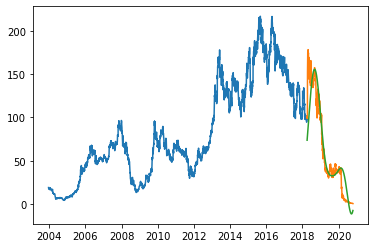

In [202]:
#now the score is so much higher and the curve fits the test data. 
print('Score:',rbf_model_1.score(X_test, y_test) )

sns.lineplot(x = X_train_vis, y = y_train_vis)
sns.lineplot(x = X_test_vis, y = y_test_vis)
sns.lineplot(x = X_test_vis, y = y_pred_rbf_1)

#this is because the dataset have a clear positive trend in the training set and 
#an negative trend in the test set. This is only the case in this set and is random.
